# show how this work

The idea here is to have four panels beside each other representing the steps it takes to take an individual object, and a model, and spit out a probability for it

far left: information on an object - mass, parallax, solution type

1: a slice of a sc cube for the solution type in question in $(T,\lambda)$

1.5: right arrow, above it saying 'adjust for mass, parallax of the object'

2: adjusted sc cube slice in $(T,q)$

3: model cube in $(T,q)$

4: multiplication of the two cubes

far right: arrow and then an overall probability written as a %

In [80]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from astropy.table import Table
import pickle
import pandas as pd
import SyntheticData as sd
import Sampler
import json

In [81]:
import style

In [82]:
sc_cubes = pickle.load(open("./data/2025-12-10-200pc_mdwarf_circular_3plx.pkl", "rb"))
t_loaded = Table.read('./data/200pc_mdwarfs_reduced.fits', format='fits')

In [83]:
target_object = {
    'mass': 0.4,
    'parallax': 10,
    'soltype_index': 1
}

In [84]:
#1 extract sc slice
sc_cube = sc_cubes["data"][sc_cubes["meta"]["parallaxes"][1]][:,:,target_object["soltype_index"]]/250

#2 convert it to q space
grid_size = (35,20)
using_periods = np.linspace(1,8,grid_size[0]+2)
using_qs = np.linspace(0.05,0.5,grid_size[1]+2)
adjusted_sc_cube = Sampler.compute_grid(target_object, sc_cubes, using_periods[1:-2], using_qs[1:-2], q_space=True)

#3 choose model
model_cube = Sampler.create_model_cube(grid_size, p_model=(5,1.3), q_model=0.5)

#4 multiply together
convolved_cube = adjusted_sc_cube*model_cube

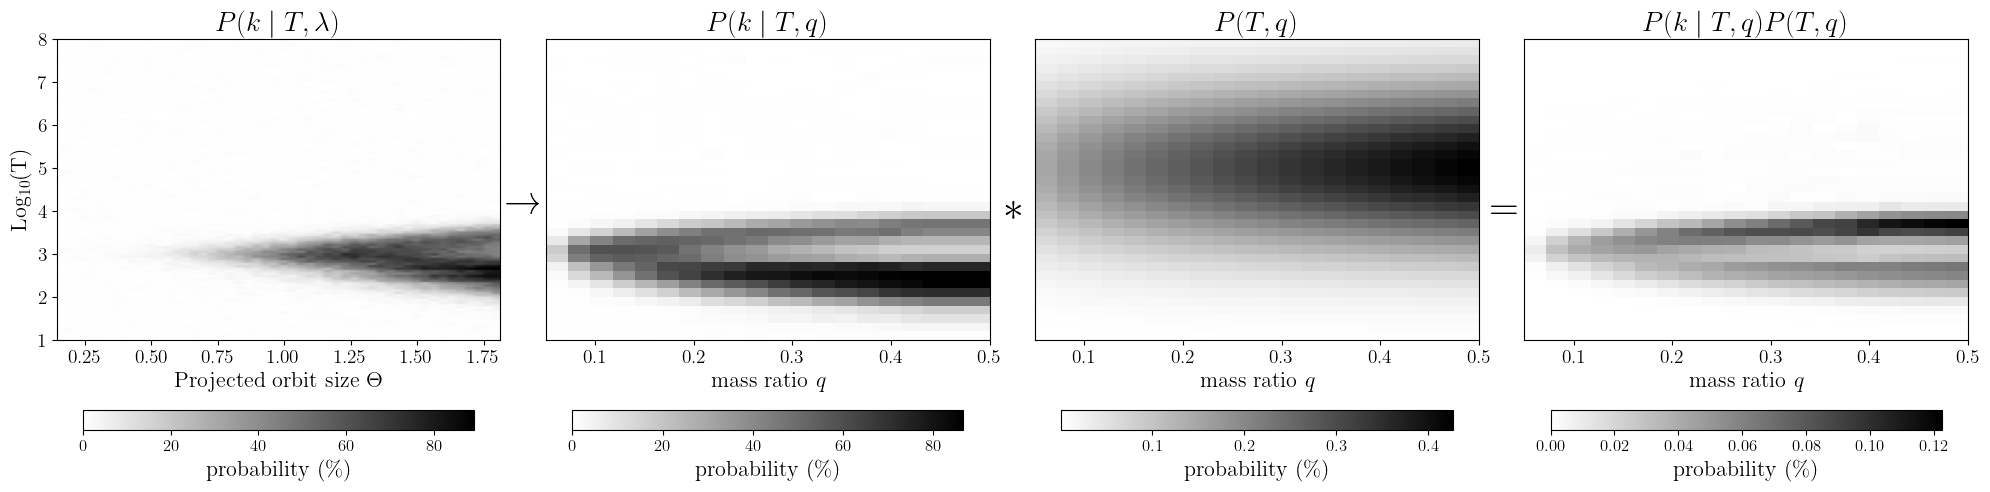

In [58]:
def plot_imshow(ax, grid, ys, xs):
    im = ax.imshow(grid, extent=[xs[0], xs[-1], ys[-1], ys[0]], aspect="auto", cmap="binary")
    ax.invert_yaxis()
    return im

labelsize = 16
titlesize = 20

fig, axs = plt.subplots(1, 4, figsize=(20,5))
# Add text arrows and symbols between subplots
fig.text(0.265, 0.57, '→', fontsize=30, ha='center', va='center',
         transform=fig.transFigure)

fig.text(0.51, 0.57, r'$*$', fontsize=30, ha='center', va='center',
         transform=fig.transFigure)

fig.text(0.755, 0.57, r'$=$', fontsize=30, ha='center', va='center',
         transform=fig.transFigure)

axs[0].set_ylabel(r'Log$_{10}$(T)', fontsize=labelsize)
axs[0].set_xlabel(r'Projected orbit size $\Theta$', fontsize=labelsize)
axs[1].set_xlabel(r'mass ratio $q$', fontsize=labelsize)
axs[2].set_xlabel(r'mass ratio $q$', fontsize=labelsize)
axs[3].set_xlabel(r'mass ratio $q$', fontsize=labelsize)
axs[0].set_title(r'$P(k\mid T,\lambda)$', fontsize=titlesize)
axs[1].set_title(r'$P(k\mid T,q)$', fontsize=titlesize)
axs[2].set_title(r'$P(T,q)$', fontsize=titlesize)
axs[3].set_title(r'$P(k\mid T,q)P(T,q)$', fontsize=titlesize)
im0 = plot_imshow(axs[0], 100*sc_cube, np.log10(sc_cubes["meta"]["periods"]), np.array(sc_cubes["meta"]["lambdas"][1]))
im1 = plot_imshow(axs[1], 100*adjusted_sc_cube, using_periods, using_qs)
im2 = plot_imshow(axs[2], 100*model_cube, using_periods, using_qs)
im3 = plot_imshow(axs[3], 100*convolved_cube, using_periods, using_qs)

for ax, im in zip(axs, [im0, im1, im2, im3]):
    cbar = fig.colorbar(
        im,
        ax=ax,
        orientation="horizontal",
        pad=0.18,      # distance from plot
        fraction=0.05,  # thickness
    )
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(r"probability (\%)", size=16)

for ax in axs[1:]:
    ax.set_yticks([])

plt.tight_layout()
plt.savefig("./plots/demonstration.jpg", dpi=800);

In [59]:
convolved_cube.sum()

np.float64(0.0781205354798043)

with brackets if that seems interesting

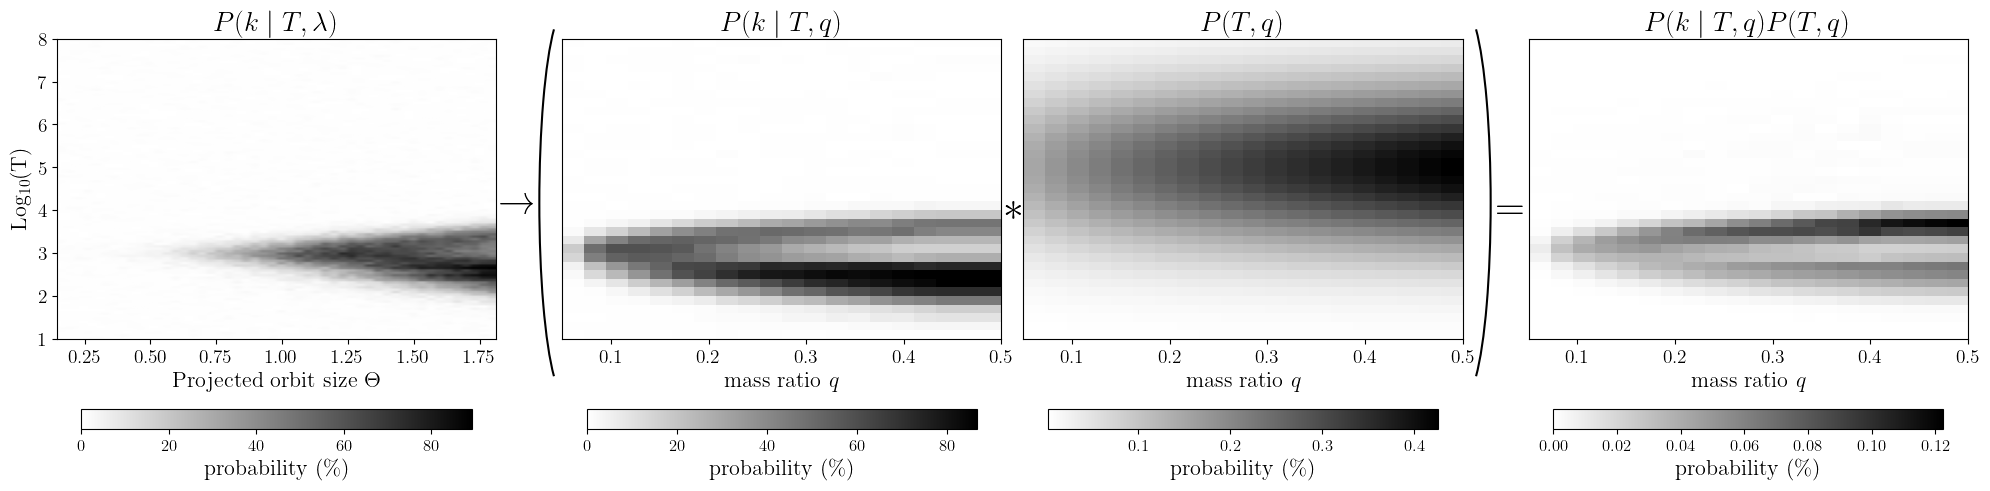

In [110]:
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Arc
import numpy as np

def plot_imshow(ax, grid, ys, xs):
    im = ax.imshow(
        grid,
        extent=[xs[0], xs[-1], ys[-1], ys[0]],
        aspect="auto",
        cmap="binary"
    )
    ax.invert_yaxis()
    return im


labelsize = 16
titlesize = 20

# --- Figure + GridSpec ---
fig = plt.figure(figsize=(20, 5))

gs = gridspec.GridSpec(
    1, 7,
    width_ratios=[1, 0.15, 1, 0.05, 1, 0.15, 1],
    wspace=0.0
)

# Real axes (skip spacer columns)
axs = [
    fig.add_subplot(gs[0, 0]),  # panel 1
    fig.add_subplot(gs[0, 2]),  # panel 2
    fig.add_subplot(gs[0, 4]),  # panel 3
    fig.add_subplot(gs[0, 6]),  # panel 4
]

# --- Symbols between panels ---
fig.text(0.262, 0.57, '→', fontsize=30, ha='center', va='center')
fig.text(0.51,  0.57, r'$*$', fontsize=30, ha='center', va='center')
fig.text(0.758, 0.57, r'$=$', fontsize=30, ha='center', va='center')

# --- Axis labels ---
axs[0].set_ylabel(r'Log$_{10}$(T)', fontsize=labelsize)
axs[0].set_xlabel(r'Projected orbit size $\Theta$', fontsize=labelsize)

axs[1].set_xlabel(r'mass ratio $q$', fontsize=labelsize)
axs[2].set_xlabel(r'mass ratio $q$', fontsize=labelsize)
axs[3].set_xlabel(r'mass ratio $q$', fontsize=labelsize)

# --- Titles ---
axs[0].set_title(r'$P(k\mid T,\lambda)$', fontsize=titlesize)
axs[1].set_title(r'$P(k\mid T,q)$', fontsize=titlesize)
axs[2].set_title(r'$P(T,q)$', fontsize=titlesize)
axs[3].set_title(r'$P(k\mid T,q)P(T,q)$', fontsize=titlesize)

# --- Plots ---
im0 = plot_imshow(
    axs[0],
    100 * sc_cube,
    np.log10(sc_cubes["meta"]["periods"]),
    np.array(sc_cubes["meta"]["lambdas"][1])
)

im1 = plot_imshow(
    axs[1],
    100 * adjusted_sc_cube,
    using_periods,
    using_qs
)

im2 = plot_imshow(
    axs[2],
    100 * model_cube,
    using_periods,
    using_qs
)

im3 = plot_imshow(
    axs[3],
    100 * convolved_cube,
    using_periods,
    using_qs
)

# --- Colorbars ---
for ax, im in zip(axs, [im0, im1, im2, im3]):
    cbar = fig.colorbar(
        im,
        ax=ax,
        orientation="horizontal",
        pad=0.18,
        fraction=0.05
    )
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(r"probability (\%)", size=16)

# --- Clean up y-ticks ---
for ax in axs[1:]:
    ax.set_yticks([])

# --- Parentheses as arcs in spacer columns ---

# Common vertical span (based on axes 2 & 3)
bbox2 = axs[1].get_position()
bbox3 = axs[2].get_position()

bottom = min(bbox2.y0, bbox3.y0)
top    = max(bbox2.y1, bbox3.y1)
center_y = 0.5 * (bottom + top)
height = (top - bottom) * 1.05

# ----- Left arc (between panels 1 and 2) -----
bbox_left = gs[0, 1].get_position(fig)

arc_left = Arc(
    (bbox_left.x0 + bbox_left.width * 0.65 - 0.035, center_y),
    width=bbox_left.width * 1,
    height=height*1.25,
    theta1=91,
    theta2=269,
    lw=1.5,
    color='black',
    transform=fig.transFigure
)

# ----- Right arc (between panels 3 and 4) -----
bbox_right = gs[0, 5].get_position(fig)

arc_right = Arc(
    (bbox_right.x0 + bbox_right.width * 0.35 + 0.03, center_y),
    width=bbox_right.width * 1,
    height=height*1.25,
    theta1=-89,
    theta2=89,
    lw=1.5,
    color='black',
    transform=fig.transFigure
)

fig.add_artist(arc_left)
fig.add_artist(arc_right)

plt.tight_layout()
#plt.savefig("./plots/demonstration.jpg", dpi=800)
plt.show()